In [4]:
# import librairs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, f1_score, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
from sklearn.cluster import KMeans # Added KMeans import
from sklearn.metrics import silhouette_score

In [5]:
import pandas as pd
import io
import requests

# Replace with the raw file URL
url = 'https://raw.githubusercontent.com/Ahmadabudaqqa/Climate-change/main/Rainfall_1901_2016_PAK.csv'

# Fetch the content from the URL
response = requests.get(url)

# Read the content using pandas
data = pd.read_csv(io.StringIO(response.content.decode('utf-8')))

# Display the first few rows
data.head()

,Rainfall - (MM),Year,Month
0,40.4258,1901,January
1,12.3022,1901,February
2,25.5119,1901,March
3,14.2942,1901,April
4,38.3046,1901,May


In [6]:
data.shape

(1392, 3)

In [8]:
data.columns

Index(['Rainfall - (MM)', ' Year', 'Month'], dtype='object')

In [9]:
data.rename(columns={'Rainfall - (MM)':'Rainfall-(mm)',' Year':'Year'},inplace=True)
data.columns

Index(['Rainfall-(mm)', 'Year', 'Month'], dtype='object')

In [10]:
data.head(35)

,Rainfall-(mm),Year,Month
0,40.42580,1901,January
1,12.30220,1901,February
2,25.51190,1901,March
3,14.29420,1901,April
4,38.30460,1901,May
5,12.88130,1901,June
6,68.09300,1901,July
7,16.58360,1901,August
8,13.33910,1901,September
9,3.10757,1901,October


In [16]:
plt.figure(figsize=(15,8))
graph=px.bar(data.loc[(data.Year>=1990)],x="Year",y="Rainfall-(mm)",hover_name='Month',color='Month',title='Rainfall During 2000 to 2016')
graph.show()


<Figure size 1500x800 with 0 Axes>

In [17]:
graph=px.bar(data.loc[(data.Year>=2000)],x="Year",y="Rainfall-(mm)",color="Month",title='Rainfall During 2000 to 2016 Using Animation'
              ,animation_frame="Year",animation_group="Month",log_x=True,range_x=[1999,2017], range_y=[0,400])
graph.show()

In [ ]:
graph=px.line(data.loc[(data.Year>=1980)].loc[(data.Year<=2000)],x='Year',y='Rainfall-(mm)',color='Month',title='Rainfall in Year 2001 to 2016 ')
graph.show()

In [ ]:
sel=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=1980)].loc[(data.Year<=2000)].loc[(data.Month=="June")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph=px.line(sel,x='Year',y='Rainfall-(mm)',color='Month',range_x=[1979,2001],text='Rainfall-(mm)',title='Rainfall in June Year 1980 to 2000')
graph.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph.show()
sel1=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=2001)].loc[(data.Year<=2016)].loc[(data.Month=="June")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph1=px.line(sel1,x='Year',y='Rainfall-(mm)',color='Month',range_x=[2000,2017],text='Rainfall-(mm)',title='Rainfall in June during Year 20001 to 2016')
graph1.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph1.show()

In [ ]:
sel=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=1980)].loc[(data.Year<=2000)].loc[(data.Month=="July")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph=px.line(sel,x='Year',y='Rainfall-(mm)',color='Month',range_x=[1979,2001],text='Rainfall-(mm)',title='Rainfall in July Year 1980 to 2000')
graph.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph.show()
sel1=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=2001)].loc[(data.Year<=2016)].loc[(data.Month=="July")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph1=px.line(sel1,x='Year',y='Rainfall-(mm)',color='Month',range_x=[2000,2017],text='Rainfall-(mm)',title='Rainfall in July during Year 2001 to 2016')
graph1.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph1.show()

In [ ]:
sel=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=1980)].loc[(data.Year<=2000)].loc[(data.Month=="August")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph=px.line(sel,x='Year',y='Rainfall-(mm)',color='Month',range_x=[1979,2001],text='Rainfall-(mm)',title='Rainfall in August Year 1980 to 2000')
graph.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph.show()
sel1=data[['Year','Rainfall-(mm)','Month']].loc[(data.Year>=2001)].loc[(data.Year<=2016)].loc[(data.Month=="August")]
# Changed {Year, Rainfall-(mm), Month} to ['Year', 'Rainfall-(mm)', 'Month'] to select columns using a list instead of a set.
graph1=px.line(sel1,x='Year',y='Rainfall-(mm)',color='Month',range_x=[2000,2017],text='Rainfall-(mm)',title='Rainfall in August during Year 2001 to 2016')
graph1.update_traces(texttemplate='%{text:.4s}',textposition='top center')
graph1.show()

In [ ]:
sel=data[['Rainfall-(mm)','Year']].loc[(data.Year>=2000)]
# Changed {'Rainfall-(mm)','Year'} to ['Rainfall-(mm)','Year'] to select columns using a list instead of a set.

fig=px.pie(sel,values='Rainfall-(mm)',color='Year',names='Year',labels='Year',width=800,height=600,hole=0.5,title='Number of Percent Rainfall  Year during 2000 to 2016')
fig.show()

In [11]:
# Convert object (months) to numeric

# Create a dictionary to map month names to numerical values
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

# Assuming 'data' is your original DataFrame, create a copy named 'df_clean'
df_clean = data.copy()  # Create a copy of 'data' and assign it to 'df_clean'

# Use the map function to apply the mapping to the 'Month' column
df_clean['Month'] = df_clean['Month'].map(month_mapping)

df_clean['Month'] = df_clean['Month'].astype("int64")

k=2, score=0.6388558285807546
k=3, score=0.6214544914328931
k=4, score=0.588873839186903
k=5, score=0.6209727299064475
k=6, score=0.625013408193126
k=7, score=0.6833573833573834
k=8, score=0.7461279461279462
k=9, score=0.7698412698412699
k=10, score=0.8326118326118326


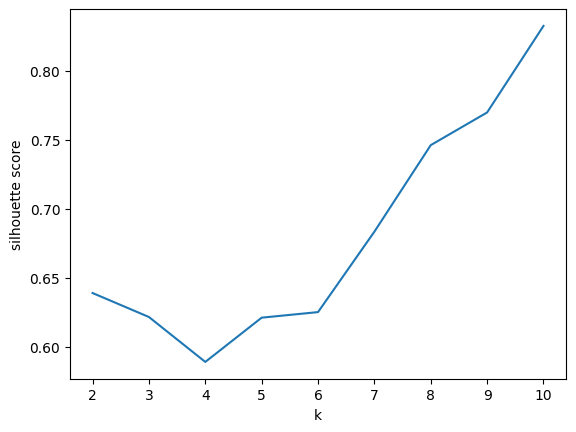

In [12]:
Xs = df_clean[['Month']].values

sscores = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10).fit(Xs)
    score = silhouette_score(Xs, km.labels_)
    sscores.append(score)
    print(f"k={k}, score={score}")


plt.plot(range(2, 11), sscores)
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.show()

<Axes: >

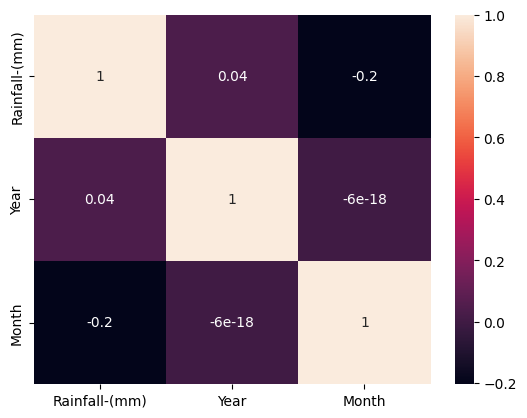

In [9]:
sns.heatmap(df_clean.corr(numeric_only=True), annot=True)

In [13]:
# Preprocess dataset
# Convert categorical 'Month' into numerical values
# Convert categorical 'Year' into numerical values
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])

In [14]:
# Define features and targets
X = data[['Month']]
Y_reg = data['Rainfall-(mm)']  # Regression target  # Changed 'Rainfall - (MM)' to 'Rainfall-(mm)'
Y_clf = (Y_reg > Y_reg.mean()).astype(int)  # Classification target

In [15]:
# Handle missing values
X = X.fillna(method='ffill')
Y_reg = Y_reg.fillna(method='ffill')

<ipython-input-15-11fb7323f1f9>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')
<ipython-input-15-11fb7323f1f9>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Y_reg = Y_reg.fillna(method='ffill')


In [16]:
# Split dataset
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, Y_reg, test_size=0.2, random_state=42)
_, _, y_train_clf, y_test_clf = train_test_split(X, Y_clf, test_size=0.2, random_state=42)

In [17]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
# Initialize models
models_reg = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR(),
    "k-Nearest Neighbors": KNeighborsRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Neural Network": MLPRegressor(random_state=42, max_iter=5000)
}
models_clf = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural Network": MLPClassifier(random_state=42, max_iter=5000)
}

In [19]:
# Hyperparameter tuning
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "k-Nearest Neighbors": {
        "n_neighbors": [3, 5, 10]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2]
    },
    "Neural Network": {
        "hidden_layer_sizes": [(50,), (100,), (50, 50)],
        "alpha": [0.0001, 0.001, 0.01]
    }
}

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

print("Regression Models:\n")

for name, model in models_reg.items():
    param_grid = param_grids.get(name, None)  # Get hyperparameters if available

    if param_grid:
        print(f"→ Performing GridSearchCV for {name}...")
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train_reg)
        model = grid_search.best_estimator_
        print(f"   Best Parameters: {grid_search.best_params_}\n")
    else:
        print(f"→ Training {name} without hyperparameter tuning...")
        model.fit(X_train_scaled, y_train_reg)

    # Predictions
    predictions = model.predict(X_test_scaled)

    # Evaluation
    mse = mean_squared_error(y_test_reg, predictions)
    r2 = r2_score(y_test_reg, predictions)

    print(f"{name}:")
    print(f"   Mean Squared Error = {mse:.4f}")
    print(f"   R² Score = {r2:.4f}\n")


Regression Models:

→ Training Linear Regression without hyperparameter tuning...
Linear Regression:
   Mean Squared Error = 433.2789
   R² Score = 0.1204

→ Training Decision Tree without hyperparameter tuning...
Decision Tree:
   Mean Squared Error = 271.6795
   R² Score = 0.4485

→ Performing GridSearchCV for Random Forest...
   Best Parameters: {'max_depth': None, 'n_estimators': 50}

Random Forest:
   Mean Squared Error = 270.7143
   R² Score = 0.4504

→ Performing GridSearchCV for Support Vector Machine...
   Best Parameters: {'C': 10, 'kernel': 'rbf'}

Support Vector Machine:
   Mean Squared Error = 388.9295
   R² Score = 0.2104

→ Performing GridSearchCV for k-Nearest Neighbors...
   Best Parameters: {'n_neighbors': 10}

k-Nearest Neighbors:
   Mean Squared Error = 267.6529
   R² Score = 0.4566

→ Performing GridSearchCV for Gradient Boosting...
   Best Parameters: {'learning_rate': 0.1, 'n_estimators': 100}

Gradient Boosting:
   Mean Squared Error = 271.5623
   R² Score = 0.4

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score

print("\nClassification Models:\n")

for name, model in models_clf.items():
    param_grid = param_grids.get(name, None)  # Get hyperparameters if available

    if param_grid:
        print(f"→ Performing GridSearchCV for {name}...")
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_scaled, y_train_clf)
        model = grid_search.best_estimator_
        print(f"   Best Parameters: {grid_search.best_params_}\n")
    else:
        print(f"→ Training {name} without hyperparameter tuning...")
        model.fit(X_train_scaled, y_train_clf)

    # Predictions
    predictions = model.predict(X_test_scaled)

    # Evaluation
    accuracy = accuracy_score(y_test_clf, predictions)
    recall = recall_score(y_test_clf, predictions, average="weighted")  # Handles multiclass cases
    f1 = f1_score(y_test_clf, predictions, average="weighted")  # Handles multiclass cases

    print(f"{name}:")
    print(f"   Accuracy  = {accuracy:.4f}")
    print(f"   Recall    = {recall:.4f}")
    print(f"   F1-Score  = {f1:.4f}\n")



Classification Models:

→ Training Logistic Regression without hyperparameter tuning...
Logistic Regression:
   Accuracy  = 0.6093
   Recall    = 0.6093
   F1-Score  = 0.5892

→ Training Decision Tree without hyperparameter tuning...
Decision Tree:
   Accuracy  = 0.7849
   Recall    = 0.7849
   F1-Score  = 0.7769

→ Performing GridSearchCV for Random Forest...
   Best Parameters: {'max_depth': None, 'n_estimators': 50}

Random Forest:
   Accuracy  = 0.7849
   Recall    = 0.7849
   F1-Score  = 0.7769

→ Performing GridSearchCV for Support Vector Machine...
   Best Parameters: {'C': 10, 'kernel': 'rbf'}

Support Vector Machine:
   Accuracy  = 0.7204
   Recall    = 0.7204
   F1-Score  = 0.7161

→ Performing GridSearchCV for k-Nearest Neighbors...
   Best Parameters: {'n_neighbors': 5}

k-Nearest Neighbors:
   Accuracy  = 0.7957
   Recall    = 0.7957
   F1-Score  = 0.7933

→ Performing GridSearchCV for Gradient Boosting...
   Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}



In [20]:
data.isna().sum()

,0
Rainfall-(mm),0
Year,0
Month,0


In [21]:
data["Rainfall-(mm)"] = data["Rainfall-(mm)"].fillna(data["Rainfall-(mm)"].mean())
data.isna().sum()

,0
Rainfall-(mm),0
Year,0
Month,0


In [22]:
from sklearn.model_selection import KFold, cross_val_score

X = data[['Month']]
y = data['Rainfall-(mm)']

models = {
    "Linear Regression": LinearRegression(),

}

kf = KFold(n_splits=5)

scl = StandardScaler()
X_scaled = scl.fit_transform(X)

for m in models:
    scores = cross_val_score(models[m], X_scaled, y, cv=kf, n_jobs=-1)
    print(f"{m}: {scores.mean():.3%}, {scores.std():.3%}")

Linear Regression: 10.414%, 1.006%


In [ ]:
# Hyperparameter tuning with grid search
from pandas import read_csv
from sklearn.tree import DecisionTreeRegressor # Changed to DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split as split, KFold

# Instead of assigning column names, let pandas infer them from the CSV file
df = read_csv('https://raw.githubusercontent.com/Ahmadabudaqqa/Climate-change/main/Rainfall_1901_2016_PAK.csv')

# Assuming 'Month' and 'Rainfall - (MM)' are your relevant columns
X = df[['Month']]
# Convert 'Month' to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Month'] = le.fit_transform(X['Month'])

# Access the column using its original name 'Rainfall - (MM)'
y = df['Rainfall - (MM)']

# Impute missing values in 'y' if any
y = y.fillna(y.mean()) # Replace NaN with the mean

X_train, X_test, y_train, y_test = split(X, y, random_state=42)
model = DecisionTreeRegressor(random_state=42) # Changed to DecisionTreeRegressor
model.fit(X_train, y_train)
# Changed from accuracy score to R-squared for regression
print(f'R-squared without tuning: {model.score(X_test, y_test):.2f}') # Changed to R-squared
kf = KFold(n_splits=5, shuffle=True, random_state=42)
params = dict(criterion=['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], max_leaf_nodes=range(2, 21)) # Changed criterion options
grid = GridSearchCV(model, params, cv=kf, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error') # Added scoring for regression
grid.fit(X_train, y_train)
print(grid.best_params_)
model.set_params(**grid.best_params_).fit(X_train, y_train)
# Changed from accuracy score to R-squared for regression
print(f'R-squared with tuning: {model.score(X_test, y_test):.2f}') # Changed to R-squared

R-squared without tuning: 0.44
Fitting 5 folds for each of 76 candidates, totalling 380 fits


<ipython-input-53-75ab5a5a7825>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



{'criterion': 'squared_error', 'max_leaf_nodes': 10}
R-squared with tuning: 0.43


In [ ]:
from sklearn.decomposition import PCA
import pandas as pd

# Assuming 'df' is your original DataFrame, and you have some transformations in mind...
# For example, let's say you want to scale the numerical features:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Use the correct column name 'Rainfall-(mm)'
numerical_features = ['Rainfall-(mm)', 'Year']  # Replace with your actual numerical columns
data_transformed = data.copy()  # Create a copy of df to avoid modifying the original
data_transformed[numerical_features] = scaler.fit_transform(data_transformed[numerical_features])

# Now you can apply PCA to the transformed DataFrame:
# Change n_components to be less than or equal to min(n_samples, n_features)
n_components = min(data_transformed.shape[0], data_transformed.shape[1])
# Get the minimum between number of rows and columns

# Or you could simply assign it to 3 or less (since error suggests min=3):
# n_components = 3
pca = PCA(n_components=n_components)  # Keep the allowed number of principal components

data_reduced = pd.DataFrame(pca.fit_transform(data_transformed))

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# Feature Scaling (Standardization or Normalization)
scaler = StandardScaler()  # or MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)

# Encoding categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')
categorical_encoded = pd.DataFrame(encoder.fit_transform(data.select_dtypes(include=[object])))

# Combine numerical and categorical transformed data
data_transformed = pd.concat([data_scaled, categorical_encoded], axis=1)


In [ ]:
x_pca.shape

(1392, 3)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Example dataset
X = np.random.rand(100, 10)  # 100 samples, 10 features
y = np.random.randint(0, 2, 100)  # Binary target variable

# Select top 5 best features
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Get selected feature indices
selected_features = selector.get_support(indices=True)
print("Selected Features:", selected_features)


Selected Features: [0 1 5 7 8]


In [ ]:
from sklearn.decomposition import PCA

# Applying PCA to reduce to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Convert to DataFrame
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3"])

print(pca_df.head())


        PC1       PC2       PC3
0 -0.168155 -0.551978 -0.111636
1  0.335139 -0.048849  0.410084
2  0.027221 -0.451909  0.134699
3 -0.266330  0.089805  0.084270
4 -0.460173  0.087302 -0.071765


In [ ]:
from sklearn.manifold import TSNE

# Reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Convert to DataFrame
tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])

print(tsne_df.head())


       Dim1      Dim2
0  2.426710 -1.032020
1 -0.295045  4.445384
2  1.846645 -2.571478
3 -2.543840 -0.178159
4 -1.139788 -3.969010
